## Machine Learning and Statistics Project - Boston House Price Dataset
![Numpy](https://cdn-images-1.medium.com/max/1200/1*L0yNfRdiH8DfYuiJTKPxww.png)

The Boston Housing dataset contains US census data published in 1978 of houses in various parts of Boston. The dataset contains information on 505 samples with 12 measurements for each sample. The samples are contained in the rows of the dataset and the measurements in the columns. 

The following is analysis of the dataset using descriptive and inferential statistics:

In [4]:
import numpy as np  # import numnerical python with shorthand  
import matplotlib.pyplot as plt  # shorthand import for matplotlib library
import seaborn as sns # import seaborn for advanced graphics
import pandas as pd # import pandas for data structures and operations for manipulating numerical tables and time series
import sklearn # for Machine Learning in Python
import scipy.stats as stats # statisitcal function
import statsmodels.api as sm # conducting statistical tests, and statistical data exploration
%matplotlib inline 
from matplotlib import rcParams # improved plots from matplotlib
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn import svm # support vector classification

The Boston House Price Dataset is loaded into the jupyter notebook from the scikit learn library

In [5]:
# Load the Boston House Price dataset from scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [6]:
#Print the values of the Boston dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses

target: prices of the house

feature_names: names of the features

DESCR: describes the dataset

Describe the shape of the dataset rows, columns

In [7]:
# Give the description of the dataset
print(boston_dataset.data.shape)

(506, 13)


In [8]:
print(boston_dataset.target.shape)

(506,)


Print the first five rows of the dataset

In [9]:
#Print the header of the Boston dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Give a description of what is contained in each column

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Append the MEDV value from target to the dataset 

In [11]:
boston['MEDV'] = boston_dataset.target
# Add MEDV value to the dataset

In [12]:
print(boston.head())
# Dataframe with price

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Descriptive Statistics

Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in target. Median value of owner-occupied homes in $1000's

In [13]:
minimum_price = np.min(boston.MEDV) # Minimum price of the data
maximum_price = np.max(boston.MEDV) # maximum price of the data
mean_price = np.mean(boston.MEDV) # mean price of the data
median_price = np.median(boston.MEDV) # median price of the data
std_price = np.std(boston.MEDV) # standard deviation of the house prices


# Show the calculated statistics
print ("The lowest house price is:", minimum_price)
print ("The highest house price is:", maximum_price)
print ("The average house price is:", mean_price)
print ("The median house price is:", median_price)
print ("The standard deviation of houses prices is:", std_price)

The lowest house price is: 5.0
The highest house price is: 50.0
The average house price is: 22.532806324110698
The median house price is: 21.2
The standard deviation of houses prices is: 9.188011545278206


In [14]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Histograms of variables 

Plot histograms of the variables within the dataset as a visual representation 

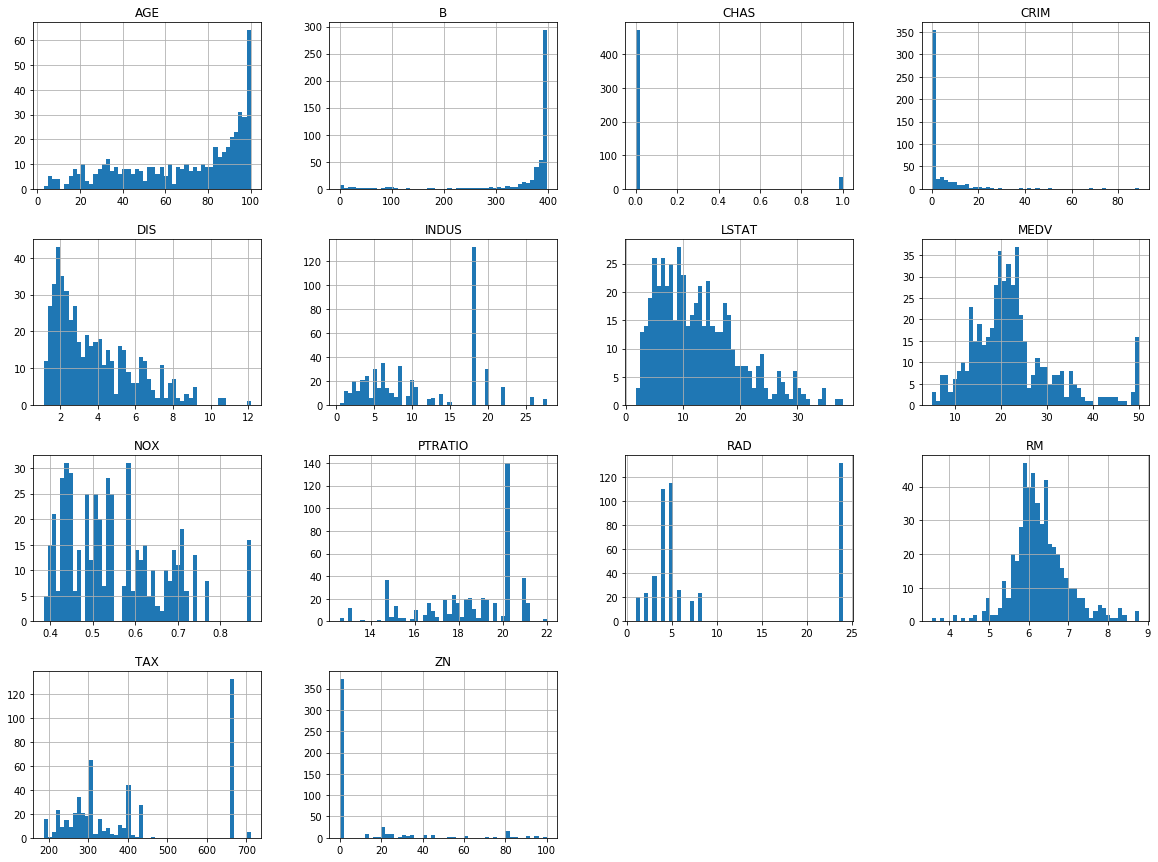

In [15]:
boston.hist(bins=50, figsize=(20,15))
plt.show()

Plot the house prices to show distribution of prices

<function matplotlib.pyplot.show(*args, **kw)>

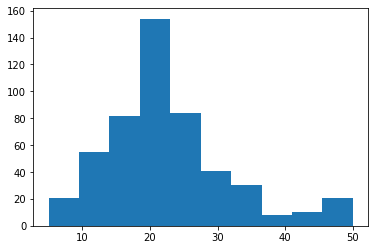

In [16]:
# Histogram of house prices in 1000's
plt.hist(boston.MEDV)
plt.show

### Distribution plot of house prices

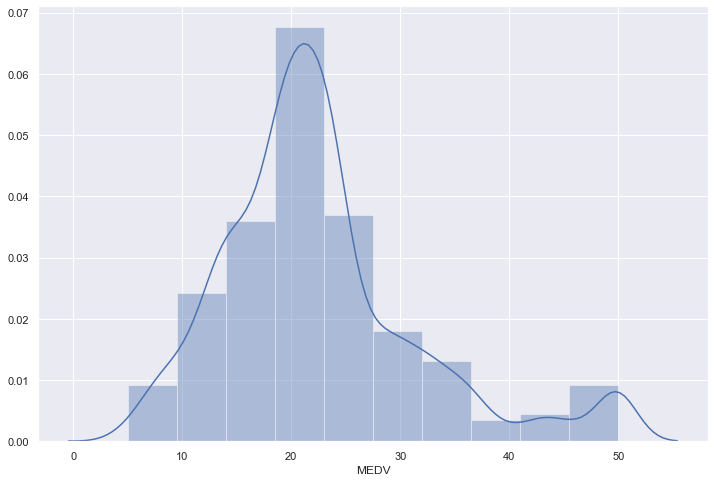

In [17]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston['MEDV'], bins=10)
plt.show()

## Correlation Heatmap
Heatmap showing the correlation matrix meausing the linear relationships between the variables of the dataset

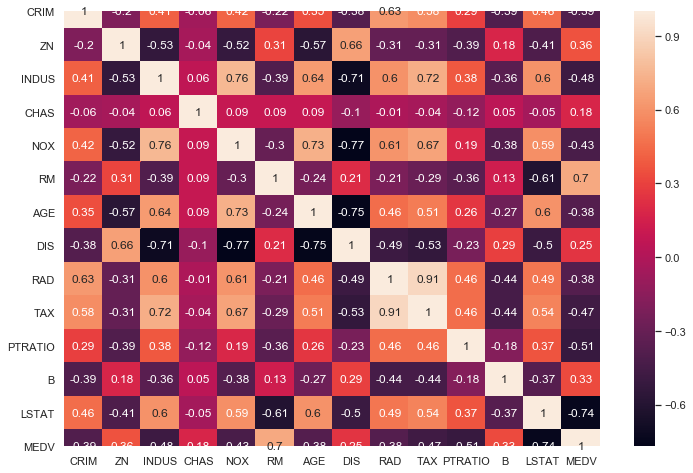

In [18]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Observations
The correlation coefficient runs on a scale of -1 to 1, 1 having stong correlation and -1 showing no correlation. MEDV shows a strong cprrelation to the RM value indicating a higher house price for a dwelling with a larger number of rooms. 

It shows negative correlation to LSTAT, lower status withing the population.

## Linear Regression

### LSAT - Percentage of lower status of the population

LSAT was selected for the linear regression module as it showed the stongest negative correlation with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. It shows that the house prices are negatively correlated linearly with the status within the population.

More "lower class" areas have lower prices.

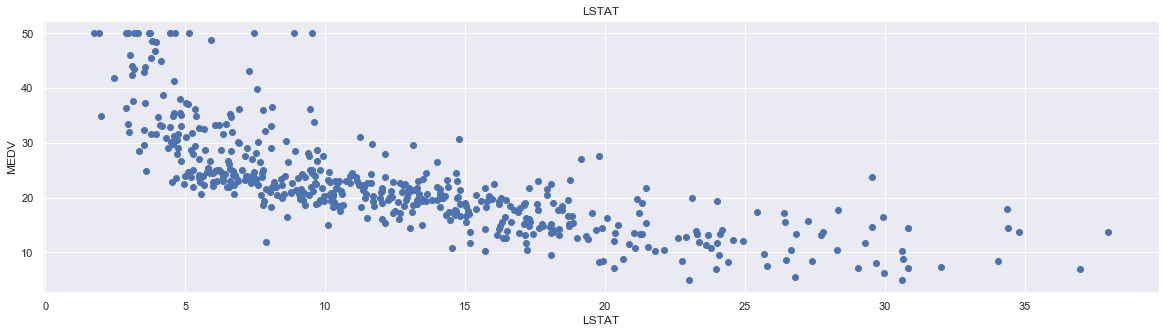

In [19]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Positive Correlation


### RM - Average number of rooms per dwelling

There is strong positive correlation with with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. There is a higher MEDV for a higher RM as more rooms would imply more space, thereby costing more, taking all other factors constant.

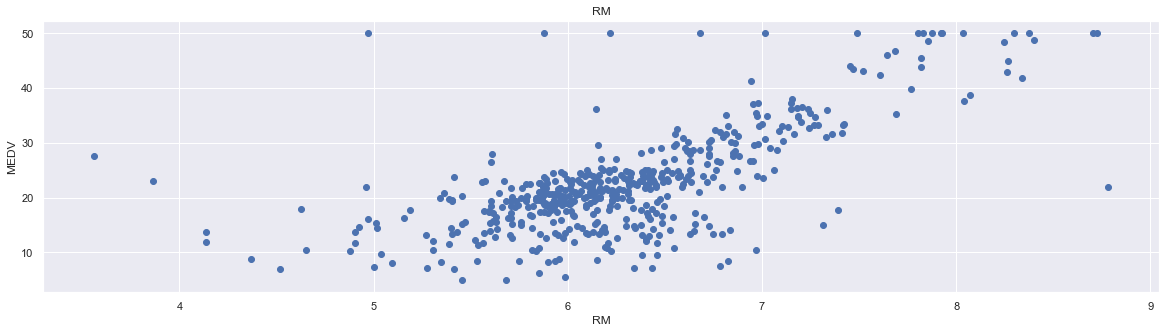

In [20]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Pupil-teacher ratio by town
There is a lower price in areas where there is a high student-to-teacher ratio due to a lower demand for houses in such areas. A high student teacher ratio results in less attention dedicated to each student and potentially impact their performance.

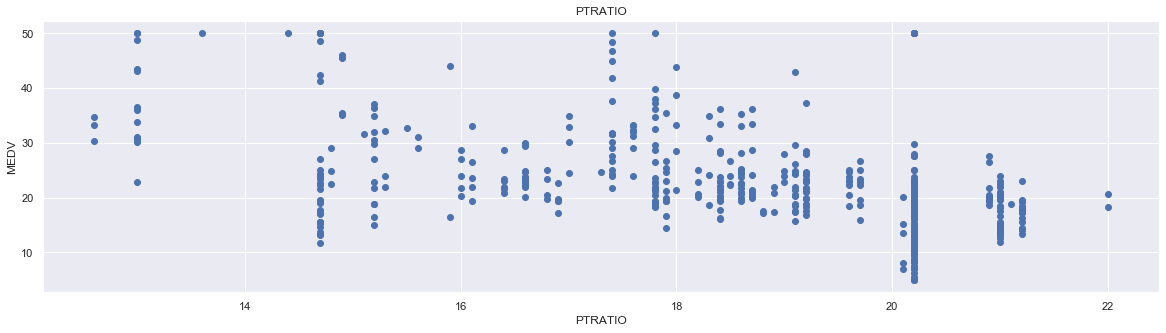

In [21]:
plt.figure(figsize=(20, 5))

features = ['PTRATIO']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Charles River Analysis

CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

Inferential statistics are used to analyse the difference in median house prices along the Charles river and houses which are not

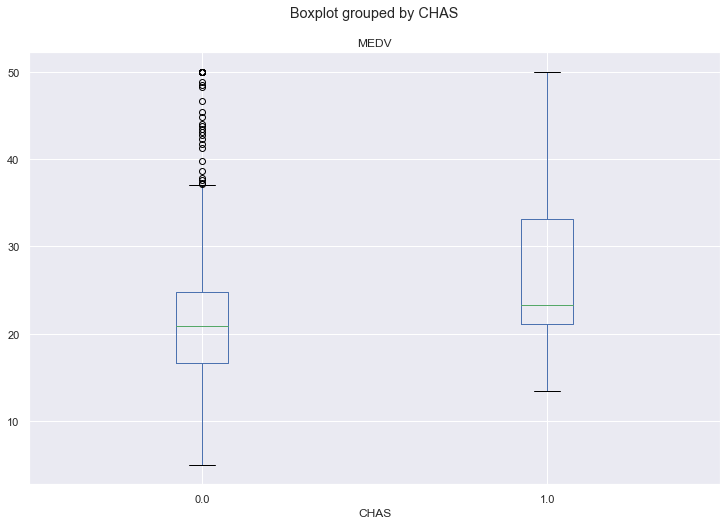

In [22]:
boston.boxplot(column='MEDV', by='CHAS')
plt.show()

The data contained in the CHAS column for whether a house is located along the Charles River or not is a boolean, 1 for houses along the river and 0 for houses not along the river. 

In [29]:
# Split the Chas data into along the river and not along the river
Along_The_River=boston.loc[boston['CHAS'] != 0]
Not_Along_The_River=boston.loc[boston['CHAS'] != 1]

In [31]:
chas = boston.CHAS
chas

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

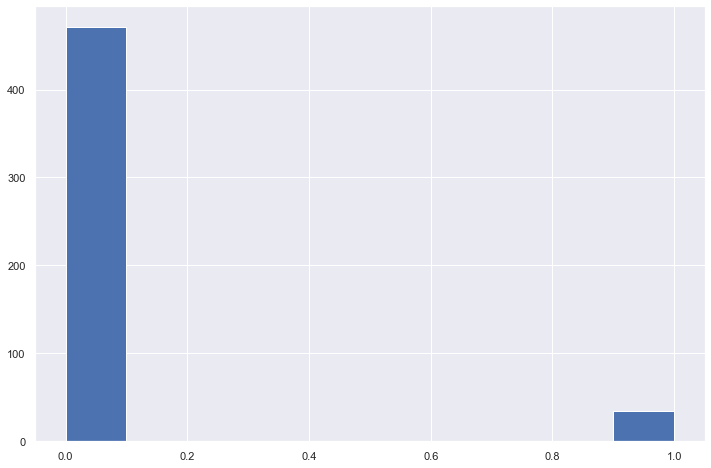

In [32]:
plt.hist(boston.CHAS)
plt.show

The histogram dispalys the number of houses houses which do not tract the river (0) and the number of house which do tract the river (1). As the median price for the houses which tract the river is higher it indicates the impact of the river on the house prices in Boston at the time the dataset was generated.

### Paired T Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

f we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


Houses along the Charles River have a higher median price than those that are not along the river.

In [38]:
import scipy.stats as ss
ss.ttest_ind(Along_The_River, Not_Along_The_River)


Ttest_indResult(statistic=array([-1.25672737, -0.95941388,  1.41576205,         inf,  2.05606692,
        2.05716762,  1.94962973, -2.23752188, -0.16542109, -0.79942169,
       -2.74837552,  1.09660468, -1.21247419,  3.99643747]), pvalue=array([2.09434502e-01, 3.37810305e-01, 1.57462839e-01, 0.00000000e+00,
       4.02905010e-02, 4.01840993e-02, 5.17744570e-02, 2.56884824e-02,
       8.68678887e-01, 4.24422527e-01, 6.20391597e-03, 2.73337923e-01,
       2.25898953e-01, 7.39062317e-05]))

In [36]:
Not_Along_The_River

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Train the dataset

Training Dataset: The sample of data used to fit the model.
The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data. (https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

In [19]:
from sklearn.linear_model import LinearRegression # used to train the model on both the training and test sets.

Prepare the data for training the model

In [20]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Split the data into training and testing sets. 80% of the samples are used to train the model and the remaining 20% are used to test 

In [21]:
from sklearn.model_selection import train_test_split # used to split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Scikit-learn’s LinearRegression is used to train the model on both the training and test sets.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

The model is evaluated using RMSE and R2-score.

In [28]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


### Scatter plot 

Scatter plot to visualize the difference between actual vs predicted valuesusing the X_test values

Text(0.5, 1.0, 'Actual price vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

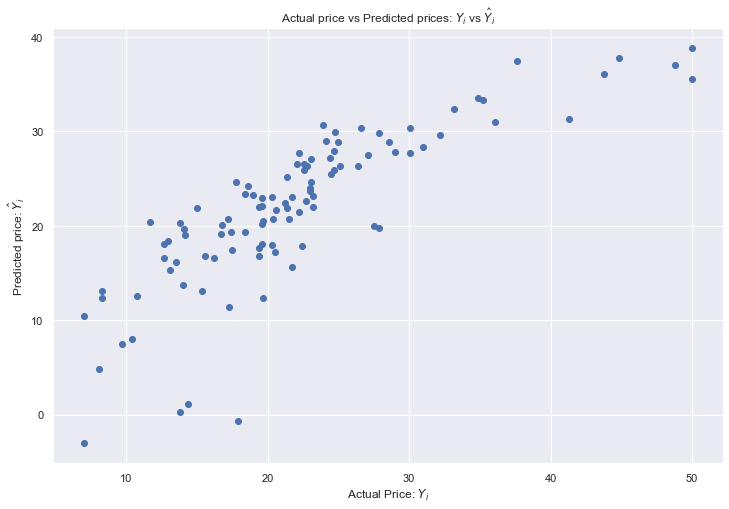

In [29]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted price: $\hat{Y}_i$")
plt.title("Actual price vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

![Keras](https://miro.medium.com/max/1000/1*LkKz4wtZNBo5i-Vc8DWhTA.png)

Create a neural network to predict the median house price based on the other variables in the dataset.

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. 

In [33]:
inputs = [boston['RM'], boston['LSTAT'], boston['PTRATIO']]
inputs

[0      6.575
 1      6.421
 2      7.185
 3      6.998
 4      7.147
        ...  
 501    6.593
 502    6.120
 503    6.976
 504    6.794
 505    6.030
 Name: RM, Length: 506, dtype: float64, 0      4.98
 1      9.14
 2      4.03
 3      2.94
 4      5.33
        ... 
 501    9.67
 502    9.08
 503    5.64
 504    6.48
 505    7.88
 Name: LSTAT, Length: 506, dtype: float64, 0      15.3
 1      17.8
 2      17.8
 3      18.7
 4      18.7
        ... 
 501    21.0
 502    21.0
 503    21.0
 504    21.0
 505    21.0
 Name: PTRATIO, Length: 506, dtype: float64]

In [34]:
output = boston['MEDV']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras as kr

In [36]:
# Create a new neural network.
m = kr.models.Sequential()

In [37]:
# Add neurons.
# m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

In [38]:
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [39]:
# Train the model.
m.fit(inputs, output, epochs=15, batch_size=10)

ValueError: Error when checking input: expected dense_input to have shape (4,) but got array with shape (1,)

In [ ]:
# Run each x value through the neural network.
p = m.predict(inputs)

In [ ]:
# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

In [ ]:
# Create some input values
x =np.arrange(0.0, 10.0, 1)

#Run each x value through the neuaral network

In [ ]:
# Plot the values
plt.plot(x, y, 'k.')

## Preprocessing the Data
Put data into format for data analysis help the nural network make better predictions

In [ ]:
import sklearn.preprocessing as pre

In [ ]:
x =boston[['RM', 'LSAT', 'PTRATIO']]
x

In [ ]:
pre.scale(x)

In [45]:
# # Preprocessing with sklearn
# 
# [https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)

import pandas as pd
import sklearn.preprocessing as pre
import numpy as np

# One-off scaling

# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
xscale = boston(pre.scale(x))
xscale


# Fitting and transforming

scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_


xscale = boston(scaler.transform(x), columns=x.columns)
xscale


scaler.transform(np.array([[1.0, 0.5, 10.0, 4.1]]))


# #### Output values

y = boston[['MEDV']]
y


encoder = pre.OneHotEncoder()
encoder.fit(y)
yencoded = encoder.transform(y)
yencoded.toarray()


encoder.inverse_transform(yencoded)


# #### Whitening

x.corr()


import sklearn.decomposition as dec


pca = dec.PCA(n_components=4, whiten=True)
pca.fit(x)
xwhite = boston(pca.transform(x), columns=x.columns)
xwhite

xwhite.corr().round()


xwhite.mean().round()

xwhite.std().round()



TypeError: 'DataFrame' object is not callable

### Whitening